In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, accuracy_score


# Hiding Errors to not take up space in HTML
import warnings
warnings.filterwarnings("ignore")

## 1. Data Exploration and Preprocessing

In [3]:
# Laoding the Dataset
mba_df = pd.read_csv('MBA 2.csv')
mba_df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


### A. Checking for Null Values/Missing Values

In [4]:
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


Looking at the dtaset, there are two columns that have null values. That being in the race and admissions column

In [5]:
for each in mba_df.columns:
    print(f'there are {mba_df[each].isnull().sum()} null values in the {each} column')

there are 0 null values in the application_id column
there are 0 null values in the gender column
there are 0 null values in the international column
there are 0 null values in the gpa column
there are 0 null values in the major column
there are 1842 null values in the race column
there are 0 null values in the gmat column
there are 0 null values in the work_exp column
there are 0 null values in the work_industry column
there are 5194 null values in the admission column



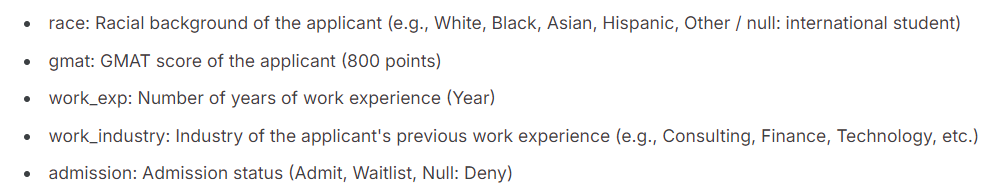

There are quite a bit of null values for both the race and admission column, as most of the data in the admission column are null, and a considerable number of data in the race column are also missing.

**However,** the information about the dataset in Kaggle shows that null values in the race column are people who are categorized as having a race that is "other", a person who is neither white, black, asian, nor hispanic. Additionally, the same is true for the admission column where there is a value delegated for null values, where null values in the admission column would mean that the person has been denied.

Therefore, it can be inferred that **there are no missing values in the dataset**, and thus there are no types of missing data as the null values do represent a value.

### B. Handling Null Data: Encoding null in admission as Deny, and null in race as other
As the creator of the MBA dataset has indicated that the null values in the columns of race and admission had assigned values to them, international student/other, and deny respectively, there is therefore a need to change the null data into its corresponding class in order to not have it treated as null values


In [6]:
# Turning null data into string
mba_df['race'] = mba_df['race'].apply(lambda x: "Other" if pd.isna(x) else x)

mba_df['admission'] = mba_df['admission'].apply(lambda x: "Deny" if pd.isna(x) else x)

mba_df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,Deny
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Deny
6191,6192,Female,True,3.22,Business,Other,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,Other,590.0,5.0,Other,Deny


In [7]:
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [8]:
for each in mba_df.columns:
    print(f'there are {mba_df[each].isnull().sum()} null values in the {each} column')

there are 0 null values in the application_id column
there are 0 null values in the gender column
there are 0 null values in the international column
there are 0 null values in the gpa column
there are 0 null values in the major column
there are 0 null values in the race column
there are 0 null values in the gmat column
there are 0 null values in the work_exp column
there are 0 null values in the work_industry column
there are 0 null values in the admission column


There are now no more null values in the dataset

### C. Performing some Exploratory Data Analysis

In [9]:
mba_df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


Ignoring application_id as it not relly a part of the features, and they are unique identifiers for each of the person in the dataset, we can infer that based on the mean and median of gpa, gmat, and work_exp the data suggests symmetry as the mean and median are the same (with slight differences)

In [10]:
mba_df.describe(include=['object'])

,gender,major,race,work_industry,admission
count,6194,6194,6194,6194,6194
unique,2,3,5,14,3
top,Male,Humanities,Other,Consulting,Deny
freq,3943,2481,2079,1619,5194


The story with the categorical values tell a very different story wherin the most frequent class type captures the data unevenly. The imbalance in the gender is not as extreme as with the other categorical

### Visualizing Distributions of all of the Features and the Target Variable

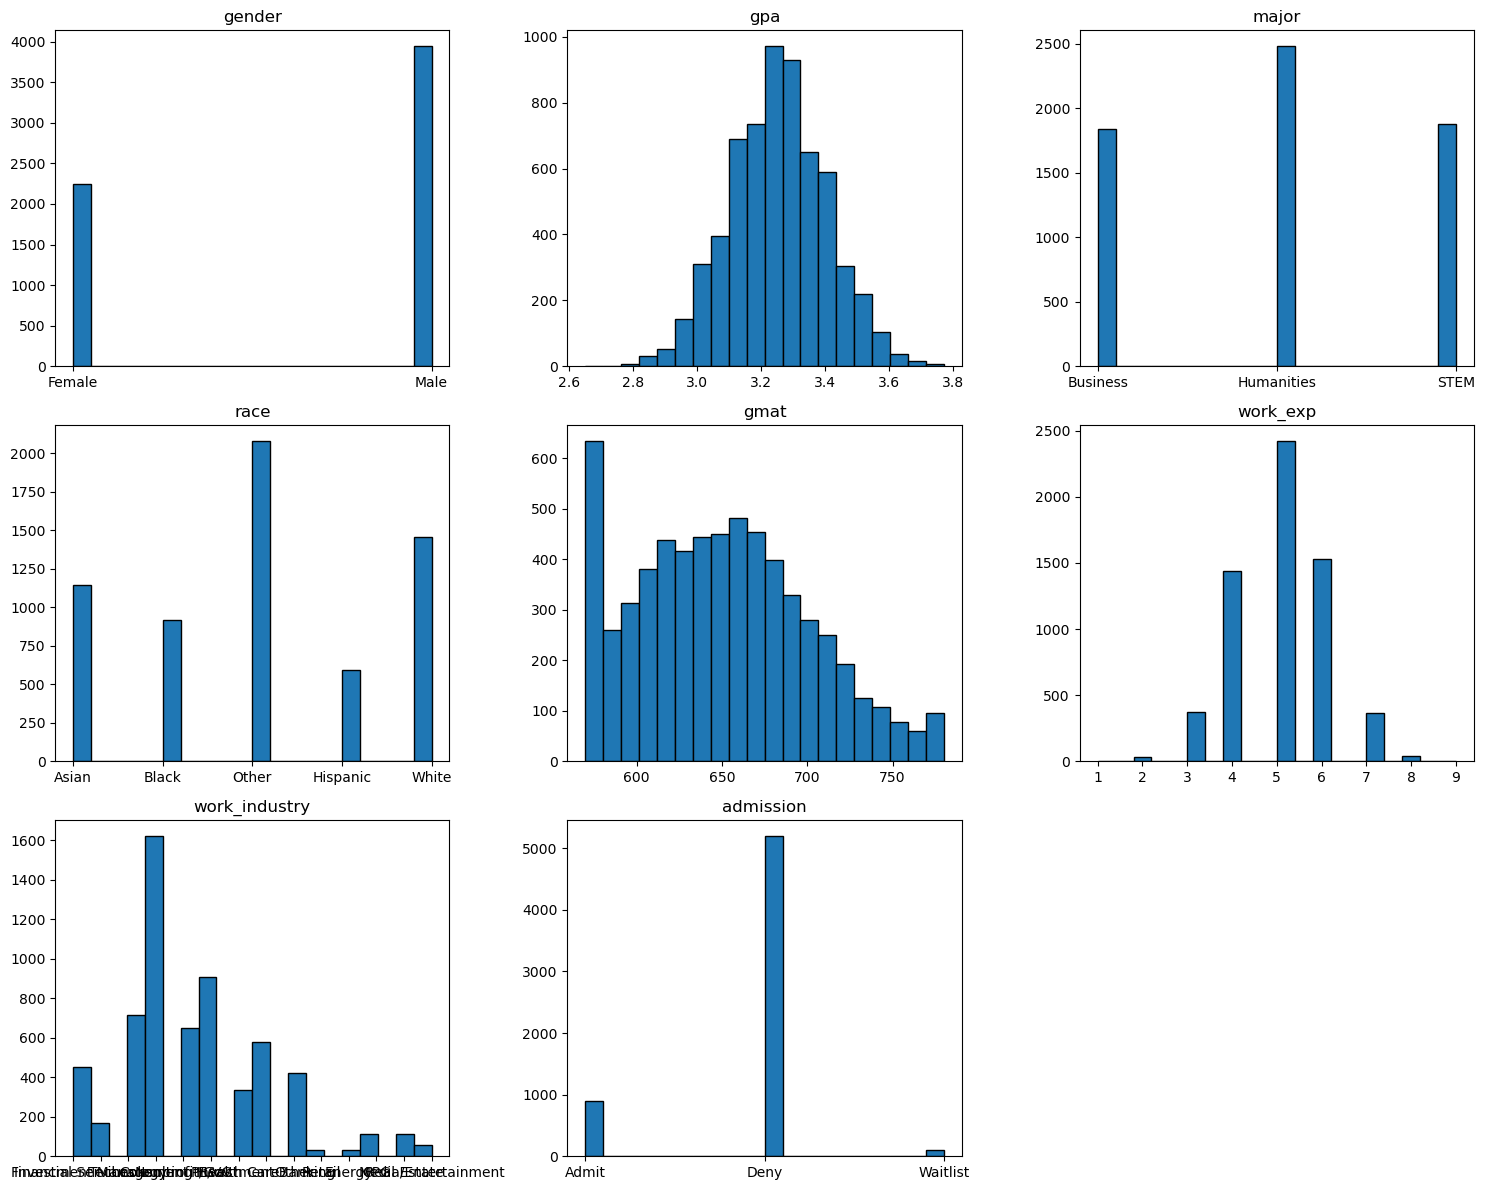

In [11]:

# Get the number of features
num_features = mba_df.select_dtypes(include=['float64', 'object']).columns
num_plots = len(num_features)

# Define the number of rows and columns for the subplot grid
rows = num_plots // 3 + 1
cols = 3

# Create a figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop over each feature and create a histogram
for i, col in enumerate(num_features):
    axes[i].hist(mba_df[col].dropna(), bins=20, edgecolor='black')
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Confirming the inference from earlier, as seen in the histogram above, the gpa and work experience data are indeed normally distributed. However, the gmat data is distributed very well due to the skewness in the right. Therefore while the gpa and work experince column will be kep as is, the gmat data will be standaradized.

Looking into categorical features, all of the data is not normalized. In the race column, "other" has significantly more values compared to other types, and in the major, humanities has a bit more compared to the other majors. The worst offender would be the work industry where there are some industries that are very much represented, the "consulting" type being the highest, there are also some that have very few counts.

The Target column is the most imbalanced, wherein deny constitutes around 83% of the data, while waitlist is very much underrepresented representing less than 2%. Acceptance is also a minority with only a bit under 15%. The target column is very imbalances as seen below

In [12]:
# Viewing ratios of the target column
# Assuming 'admission' is the column in your DataFrame
admission_counts = mba_df['admission'].value_counts()

# Calculate the total number of entries
total_admissions = len(mba_df['admission'])

# Calculate percentages
admission_percentages = (admission_counts / total_admissions) * 100

# Display counts and percentages
print("Admission Counts:")
print(admission_counts)
print("\nAdmission Percentages:")
print(admission_percentages)

Admission Counts:
Deny        5194
Admit        900
Waitlist     100
Name: admission, dtype: int64

Admission Percentages:
Deny        83.855344
Admit       14.530191
Waitlist     1.614466
Name: admission, dtype: float64


### D. Log Transforming GMAT column
The GMAT column is the only numerical variable that is not normally distrubted and has exhibited right skewness.

Log transformation is an effective method for addressing right skewness because it compresses the high end of the distribution while expanding the low end, helping to create a more balanced and normally distributed dataset

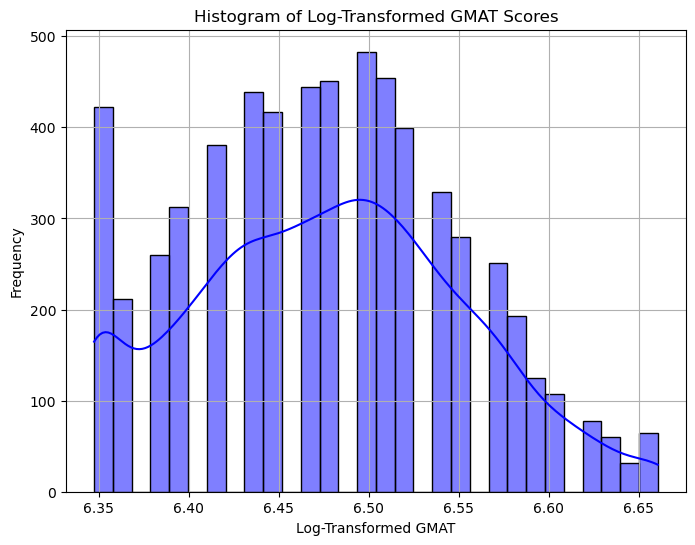

In [13]:
# Applying log transformation (using log1p to handle zeros and small values)
mba_df['gmat_log'] = np.log1p(mba_df['gmat'])

#  Plotting the histogram of the log-transformed GMAT values
plt.figure(figsize=(8, 6))
sns.histplot(mba_df['gmat_log'], bins=30, kde=True, color='blue')
plt.title('Histogram of Log-Transformed GMAT Scores')
plt.xlabel('Log-Transformed GMAT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### E. Encoding Categorical Variables:
There are 4 categorical features in the dataset. These are: Gender, Major, Race, and Work Industry. And the Target variables is also a category - whether the person got admitted, denied, or waitlisted. To encode them, klearn.preprocessing.LabelEncoder is used

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


#  Binary encoding for 'gender' as gender only has 2 categories
mba_df['gender_encoded'] = mba_df['gender'].map({'Male': 0, 'Female': 1})

# Initializing LabelEncoder for the other categorical columns
label_encoder = LabelEncoder()

# Encode other categorical columns
mba_df['major_encoded'] = label_encoder.fit_transform(mba_df['major']) + 1  # Adding 1 to start encoding from 1
mba_df['race_encoded'] = label_encoder.fit_transform(mba_df['race']) + 1
mba_df['work_industry_encoded'] = label_encoder.fit_transform(mba_df['work_industry']) + 1
mba_df['admission_encoded'] = label_encoder.fit_transform(mba_df['admission']) + 1

In [15]:
mba_df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission,gmat_log,gender_encoded,major_encoded,race_encoded,work_industry_encoded,admission_encoded
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit,6.431331,1,1,1,4,1
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny,6.523562,0,2,2,7,2
2,3,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit,6.566672,1,1,4,14,1
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny,6.538140,0,3,2,14,2
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny,6.381816,0,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,Deny,6.463029,0,1,5,10,2
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Deny,6.508769,0,3,2,2,2
6191,6192,Female,True,3.22,Business,Other,680.0,5.0,Health Care,Admit,6.523562,1,1,4,5,1
6192,6193,Male,True,3.36,Business,Other,590.0,5.0,Other,Deny,6.381816,0,1,4,10,2


### F. Creating Final MBA dataset
With a lot of new variables made as a result of cleaning and preprocessing, the specific new variables will be chosen and a final dataframe will be created for the next steps


In [16]:
# Choosing the new variables for the final dataframe

mba_df_final = mba_df[['gender_encoded', 'major_encoded', 'race_encoded', 'work_industry_encoded', 'gpa', 'gmat_log', 'work_exp', 'admission_encoded']]
mba_df_final

,gender_encoded,major_encoded,race_encoded,work_industry_encoded,gpa,gmat_log,work_exp,admission_encoded
0,1,1,1,4,3.30,6.431331,3.0,1
1,0,2,2,7,3.28,6.523562,5.0,2
2,1,1,4,14,3.30,6.566672,5.0,1
3,0,3,2,14,3.47,6.538140,6.0,2
4,0,3,3,2,3.35,6.381816,5.0,2
...,...,...,...,...,...,...,...,...
6189,0,1,5,10,3.49,6.463029,5.0,2
6190,0,3,2,2,3.18,6.508769,4.0,2
6191,1,1,4,5,3.22,6.523562,5.0,1
6192,0,1,4,10,3.36,6.381816,5.0,2


In [17]:
# Renaming to remove _encoded

mba_df_final.columns = mba_df_final.columns.str.replace('_encoded', '', regex=False)
mba_df_final

,gender,major,race,work_industry,gpa,gmat_log,work_exp,admission
0,1,1,1,4,3.30,6.431331,3.0,1
1,0,2,2,7,3.28,6.523562,5.0,2
2,1,1,4,14,3.30,6.566672,5.0,1
3,0,3,2,14,3.47,6.538140,6.0,2
4,0,3,3,2,3.35,6.381816,5.0,2
...,...,...,...,...,...,...,...,...
6189,0,1,5,10,3.49,6.463029,5.0,2
6190,0,3,2,2,3.18,6.508769,4.0,2
6191,1,1,4,5,3.22,6.523562,5.0,1
6192,0,1,4,10,3.36,6.381816,5.0,2


In [18]:
# Splitting the dataset

# Choosing the specific features for x and y
X = mba_df_final.drop('admission', axis=1)  # Drop the target variable
y = mba_df_final['admission']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train ",X_train.shape)
print("Test ",X_test.shape)

Train  (4955, 7)
Test  (1239, 7)


## 2. Feature Selection

### A. Implementing Feature Selection Methods:

### i. Filter Method: Correlation for Numerical Values
Solving for the correlation would allow us to see which variables are related to the movements with other variables. If a variable is correlated to another variables, it means that as variable increases or decreases it was observed that the other varibale had also increased/decreased.

However, correlation works for numerical values, and not categorical. For categorical Chi-squared test  will be conducted

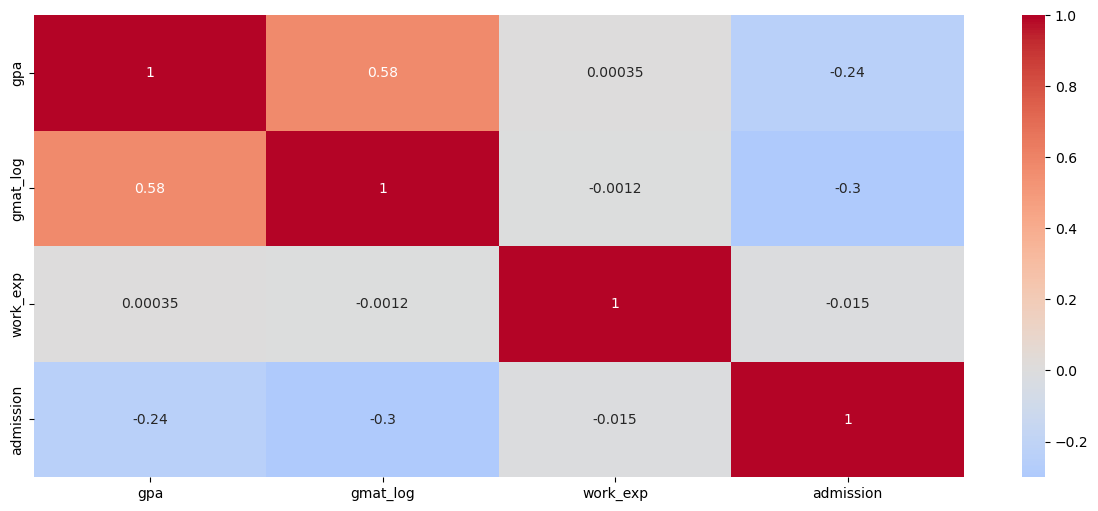

In [19]:
# Creating a correlation matrix:


# Calculate correlation matrix
df_corr = mba_df_final[['gpa', 'gmat_log', 'work_exp', 'admission']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15,6))

# Create the heatmap with a diverging color palette
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

As we wish to classify the admission column, focus is placed there. It can be observed that the numerical values of major, gpa, and gmat have correlation above 0.2. Let's eliminate the variables that has a correlation of less than 0.20, which would be work experience

In [20]:
# We select all of the features that are above the threshold of 0.05 correlation
# Remember to take the absolute value so that it wont just be positively
# Correlated that is chosen. We select the most correlated features
# with the classfication quality

threshold = .20
corr_target = df_corr['admission'].abs()
print(corr_target)
selected_feat = corr_target[corr_target > threshold].index
mba_df_final[selected_feat]

gpa          0.244910
gmat_log     0.300251
work_exp     0.015388
admission    1.000000
Name: admission, dtype: float64


,gpa,gmat_log,admission
0,3.30,6.431331,1
1,3.28,6.523562,2
2,3.30,6.566672,1
3,3.47,6.538140,2
4,3.35,6.381816,2
...,...,...,...
6189,3.49,6.463029,2
6190,3.18,6.508769,2
6191,3.22,6.523562,1
6192,3.36,6.381816,2


With the threshold set at absolute 0.20, out of the 3 numerical features only 2 met the threshold. And that is GMAT scores, and GPA. Work experience is not strongly correlated with the admission results and as such will not be chosen as a feature for the model

**Numerical Variables to inlcude:** GMAT & GPA

### ii. Filter Method: Chi-squared test for Categorical Variables
The Chi-squared test is primarily used for categorical variables. It tests the independence of two categorical variables. It determines whether the distribution of one variable differs from what would be expected if the two variables were independent. As such this test is used to see whether the categorical variables could be used to classify the admission

In [21]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

# Selecting only the specified columns
selected_columns = ['gender', 'race', 'major', 'work_industry','admission']
chi2_data = mba_df_final[selected_columns]

# Perform Chi-squared test for independence
chi2_results = {}

# Iterate through the categorical features and test with admission
for column in ['gender', 'race', 'major', 'work_industry']:
    contingency_table = pd.crosstab(chi2_data[column], chi2_data['admission'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[column] = {
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'expected_frequencies': expected
    }

# Display the results
for feature, results in chi2_results.items():
    print(f"Feature: {feature}")
    print(f"Chi-squared Statistic: {results['chi2_stat']:.4f}")
    print(f"P-value: {results['p_value']:.4f}")
    print(f"Degrees of Freedom: {results['degrees_of_freedom']}")
    print(f"Expected Frequencies:\n{results['expected_frequencies']}\n")

Feature: gender
Chi-squared Statistic: 96.1629
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies:
[[ 572.92541169 3306.41620923   63.65837908]
 [ 327.07458831 1887.58379077   36.34162092]]

Feature: race
Chi-squared Statistic: 48.5237
P-value: 0.0000
Degrees of Freedom: 8
Expected Frequencies:
[[ 166.66128511  961.82079432   18.51792057]
 [ 133.09654504  768.11494995   14.788505  ]
 [  86.59993542  499.77784953    9.62221505]
 [ 302.08266064 1743.35259929   33.56474007]
 [ 211.55957378 1220.93380691   23.50661931]]

Feature: major
Chi-squared Statistic: 4.0253
P-value: 0.4026
Degrees of Freedom: 4
Expected Frequencies:
[[ 267.06490152 1541.26122054   29.67387795]
 [ 360.49402648 2080.45108169   40.05489183]
 [ 272.44107201 1572.28769777   30.27123022]]

Feature: work_industry
Chi-squared Statistic: 30.2028
P-value: 0.2593
Degrees of Freedom: 26
Expected Frequencies:
[[1.65644172e+01 9.55950920e+01 1.84049080e+00]
 [2.35243784e+02 1.35761802e+03 2.61381983e+01]
 [4.64966096e+00

Interpreting the results of the chi-squared test would mean to be looking at both the p-value and Chi-squared Statistic. The Chi-squared statistic quantifies how much the observed counts in your data deviate from the expected counts if there were no association between the variable, while the p-value shows the statistical significance. A higher chi-squared statistic is better as it would hgihlight a strong association, while a smaller p-value is better as it would mean that the result is statistically signgifacnt (p value shoudl be less than 0.05, to qualify as statistically significant

Based on the results, gender and race both are statistically significant (p-values are 0). However, gender showed greater association compared to race as shwon by a higher chi-squared statistic. Major and work industry on the other hand is not statistically significant (p-value is greater than 0.05) and therefore will not be included 

**Categorical Variables to inlcude in model:** Gender & Race

### iii. Wrapper Method: Sequential Feature Selection (SFS)

In SFS, K nearesrt neighbors is used to select the most relevant features. However, we need to determine the optimal level of neighbors first as it is the main hyperparamter. SFS is a feature selection method that aims to select the best subset of features for building a predictive model. When combined with KNN, SFS can help identify the most relevant features that contribute to the model's accuracy. It can also help us compare with the filtering methods earlier to confirm/add whether the features that were signficant in the correlation and chi-squared test would perform well with a model

#### Choosing Optimal N, iterating through different values of N

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Putting the results in a list
mean_CV = []

# We create a listt of number from 1 to 30 and we iterate through a for loop
for k in range(1,30):
    
    # The k number is based on the iteration
    # Initializing the model based on the number of Ks currently in. Using Euclidean distance
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)
    
    #training the model with cross validation of 5 
    cv_score = cross_val_score(knn_model, X_train, y_train, cv=5)
    
    ave_cv = np.mean(cv_score)
    
    # Appending the values of K that was used, the resulting validation and test set accuracy score
    mean_CV.append([k, ave_cv])
    
mean_cv_df = pd.DataFrame(mean_CV, columns=["k", "Average CV score",])

# Sorting the DataFrame by Average CV score in descending order
mean_cv_df_sorted = mean_cv_df.sort_values(by="Average CV score", ascending=False)

# Display the sorted DataFrame
print(mean_cv_df_sorted)

     k  Average CV score
21  22          0.842381
20  21          0.842180
27  28          0.841978
22  23          0.841776
19  20          0.841574
26  27          0.841372
25  26          0.841372
24  25          0.841372
23  24          0.841372
18  19          0.841372
28  29          0.841171
16  17          0.840565
17  18          0.840363
15  16          0.839758
12  13          0.839152
14  15          0.838749
13  14          0.838547
11  12          0.837941
10  11          0.837941
8    9          0.834914
9   10          0.833502
7    8          0.832492
6    7          0.831685
4    5          0.822402
5    6          0.818769
2    3          0.805449
3    4          0.788496
0    1          0.762260
1    2          0.714228


The result above shows that a n of 22 is the most optimal

#### Running SFS 

In [23]:
SequentialFeatureSelector?

Object `SequentialFeatureSelector` not found.


In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
# Intialize KNN

# Selectiong 22 NN
knn = KNeighborsClassifier(n_neighbors=22)


# Iniatilize sfs with KNN, specifying that we need 80% of the features back
sfs = SequentialFeatureSelector(knn, n_features_to_select=.6)

# running the model
sfs.fit(X_train, y_train)

# Getting the most relevant/critical features based on specification
X_train.columns[sfs.get_support()]

Index(['race', 'work_industry', 'gpa', 'gmat_log'], dtype='object')

In [25]:
result = sfs.get_support()
result

array([False, False,  True,  True,  True,  True, False])

In [26]:
pd.DataFrame([X_train.columns, sfs.get_support()]).T

,0,1
0,gender,False
1,major,False
2,race,True
3,work_industry,True
4,gpa,True
5,gmat_log,True
6,work_exp,False


**SFS Result** Running SFS shows that race, work_industry, gpa, and gmat_log, are selected to be the most optimal features. Highlighting that only 4 out of 7 features are strongly associated enough

### B. Summarizing Result of Feature Selection: Results and Explanations

**Justification for methods used:**

The methods that were chosen for feature selection are correlation to check for the numerical values, chi-squared test for the categorical variables, and Sequential Feature Selection to check for the subsets of features. All three of these tests are justified as each of these tests serve a purpose. The Correlation test was chosen as it works well with checking for the strength of the association between the numerical values and the target value. As such it was used in order to check which of the three numerical variables should be inlcuded in the model. Similarly, the Chi-squared test is done for the categorical

There were 2 separate tests done for the numerical and categorical values, as the correlation does not work very well with categorical values as it assumes contninous data in which the categorical is not (the numbers do not represent values but rather an encoded class). While the Chi-squared test assumes for classes and not continuos data. Therefore, a separate test was done for numerical, and another separate test was done for categorical data.

The SFS test was done in order to confirm whether the results of the two tests done prior does translate to good performance through KNN. It was done to check whether indeed the variables assumed to be strongly associated throught the two tests would also be strongly associated with the results of the SFS KNN

**Summary of Results:** 

Numerical Variables to include in Model as a result of Correlation: GMAT

Categorical Variables to include in Model as Result of Chi-Square: Gender & Race

SFS Results: Race, Work Industry, GPA, and GMAT

It can be observed that most of the varibales that were most associated with the target variable as seen in the results of the correlation adn chi-square, are also the same result for the SFS, except for one varibale. This variable is Gender. The Chi-square test have deemed Gender the highest Chi-score and was statsitically significant, however it was not significant for teh SFS test. Therefore the feature will be included still, but will be ranked lower as seen below.

**Ranking the features**
1. GMAT scores
2. (2& 3) Race & GPA
4. Gender

GMAT scores is the highest ranking as it has the highest correlation but were also in the SFS. Both in second place is Race and GPA. This is because they were the second highest in their respoective tests and were also significant under the SFS test. The Fourth ranked variable is Gender, as although it was the highest in the chi-squared test, it was not significant in the SFS test. 

I have decided not to include the Work Industry even though it was significant under tehe SFS test as the result was very poor for the chi-square test. The result of teh work industry in the chi-squared test was 0.26, which is signficaintly higher than the threshold of 0.05, and I worry that because it was statistically insignificant (no strong evidence to reject the null hypothesis - and therefore not a strong association) may cause some misclassification issues in the model. As such the features chosen are GMAT, GPA, race, and gender. Four out of the original seven features. Thus, with feature selection, 3 features were cut. These features not included are work industry, major, and work experience

### The Features Chosen: GMAT score, GPA, Race, and Gender

### C. Creating Final Final MBA dataset
With the features chosen, a new dataset should be made to only include the following features relevant enough

In [27]:
mba_df_final_final = mba_df_final[['gmat_log', 'gpa', 'race', 'gender','admission']]
mba_df_final_final

,gmat_log,gpa,race,gender,admission
0,6.431331,3.30,1,1,1
1,6.523562,3.28,2,0,2
2,6.566672,3.30,4,1,1
3,6.538140,3.47,2,0,2
4,6.381816,3.35,3,0,2
...,...,...,...,...,...
6189,6.463029,3.49,5,0,2
6190,6.508769,3.18,2,0,2
6191,6.523562,3.22,4,1,1
6192,6.381816,3.36,4,0,2


In [28]:
mba_df_final_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gmat_log   6194 non-null   float64
 1   gpa        6194 non-null   float64
 2   race       6194 non-null   int32  
 3   gender     6194 non-null   int64  
 4   admission  6194 non-null   int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 193.7 KB


## 3. Handling Imbalanced Data:
With four chosen features and a target variable, we have to look at the distribution of five variables

### A. Visualizing and Calculating Distribution of Target Variable:
using histogram to visualize distribution of the final dataset

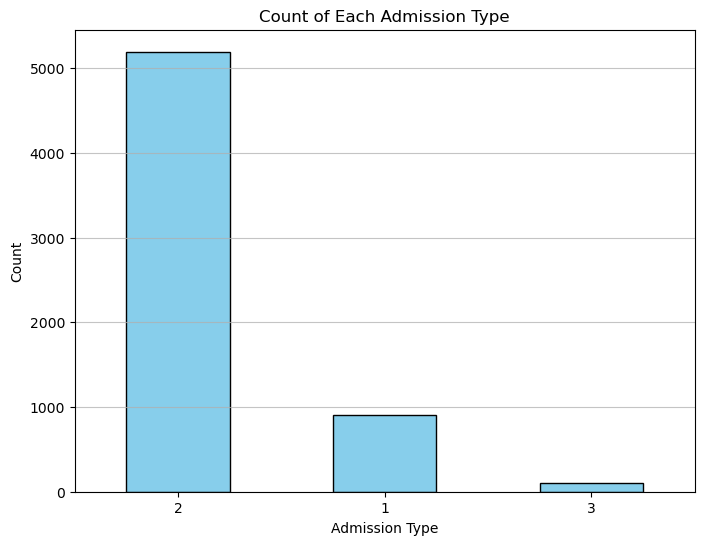

In [29]:
counts = mba_df_final_final['admission'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # No rotation for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

In [30]:
# Viewing ratios of the target column
# Assuming 'admission' is the column in your DataFrame
admission_counts = mba_df_final_final['admission'].value_counts()

# Calculate the total number of entries
total_admissions = len(mba_df_final_final['admission'])

# Calculate percentages
admission_percentages = (admission_counts / total_admissions) * 100

# Display counts and percentages
print("Admission Counts:")
print(admission_counts)
print("\nAdmission Percentages:")
print(admission_percentages)

Admission Counts:
2    5194
1     900
3     100
Name: admission, dtype: int64

Admission Percentages:
2    83.855344
1    14.530191
3     1.614466
Name: admission, dtype: float64


As seen in the bar chart as well as the percentages of distribution, it can be seen that the target variable is extremely imbalanced with denied (2) being the majority of the data at almost 84% while accepted (1) is less than 15%, and waitllisted (3) being only less than 2%. As such, handling imbalanced data is needed

### B. Handling Imbalanced data: SMOTEN and Model Class Weights

With the accepted and waitlist being very small, some of the methods to address is to either increase the samples for the minority or decrease the majority. One way to increase the minority is the Synethic Minority Oversampling Technique (SMOTE). It is a technique that generates synthetic samples for the minority classes the training dataset, and does so by finding the N nearest neighbors for a given data point and create data points in between the space of the N nearest neighbors. 

Class Weighting on the Other hand assigns different weights to samples from different classes during training. Aside from a class column there is also a weight column. Minority data are assigned heavier weights which causes a greater magnitude hopefully balancing out the data.

### i. Oversampling: Running SMOTEN (Synthetic Minority Over-sampling Technique for Nominal data)
Running SMOTE uses nerest neighbors to create the synthetic data. SMOTEN  is an extension of the traditional SMOTE method that is specifically designed for datasets containing categorical variables. It uses a different approach for generating synthetic samples that is more suitable for nominal data compared to the traditional SMOTE algorithm, and therefore more applicable with the dataset, as there are 

In [31]:
SMOTEN?

Object `SMOTEN` not found.


In [32]:
from imblearn.over_sampling import SMOTEN
from collections import Counter

# Preparing the dataset and splitting
X = mba_df_final_final.drop('admission', axis=1)
y = mba_df_final_final['admission']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEN for multi-class imbalance
# Use sampling_strategy to define how to balance classes; 'auto' balances all classes equally
oversample = SMOTEN(sampling_strategy='auto') 
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

# Output the class distribution after applying SMOTEN
print(f"# of rows before SMOTEN: {Counter(y_train)}")
print(f"# of rows after SMOTEN: {Counter(y_resampled)}")

# of rows before SMOTEN: Counter({2: 4169, 1: 704, 3: 82})
# of rows after SMOTEN: Counter({2: 4169, 1: 4169, 3: 4169})


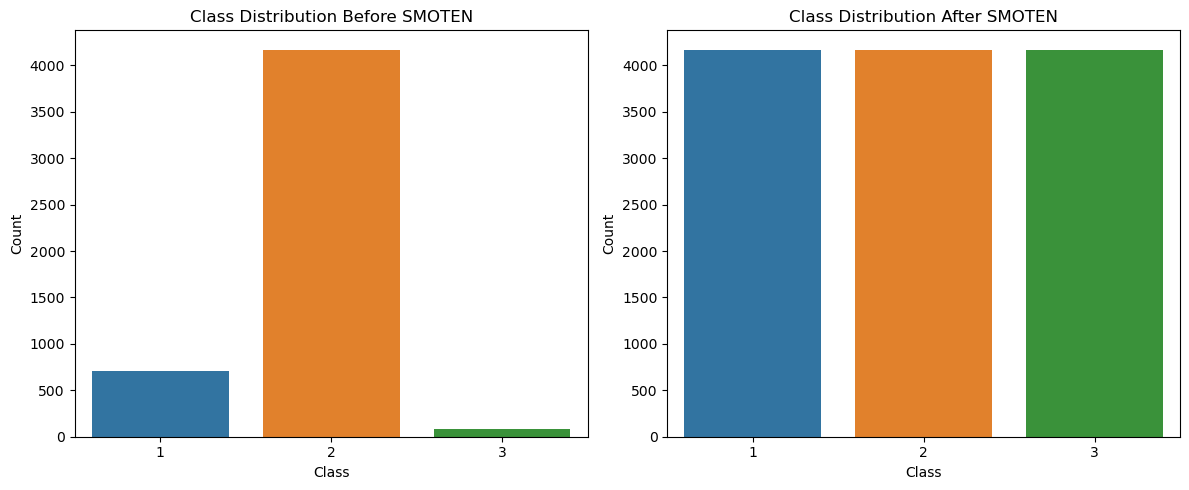

In [33]:
# Plotting the class distributions
plt.figure(figsize=(12, 5))

# Before SMOTEN
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTEN')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTEN
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTEN')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

As a result of SMOTEN the number of admissions classes had now equaled. All classes now comprise 33.33%, rather than the denied having 84% of the data. The result is that all classses, denied, waitlist, and acceptad all have 4169 rows

### Evaluating SMOTEN:
To evaluate SMOTEN I will use KNN to compare before and After SMOTEN to see if it improves its accuracy, and its ability on the test data

### Original Data
Testing for the original data would mean running kNN after obtianing the most opitmal K. After which the results will be evaluated based on the recall, and precision of the model in identifying classes 1 and 3 which are the minority data

In [34]:
# Solving for optimal K 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Putting the results in a list
mean_CV = []

# We create a listt of number from 1 to 30 and we iterate through a for loop
for k in range(1,30):
    
    # The k number is based on the iteration
    # Initializing the model based on the number of Ks currently in. Using Euclidean distance
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)
    
    #training the model with cross validation of 5 
    cv_score = cross_val_score(knn_model, X_train, y_train, cv=5)
    
    ave_cv = np.mean(cv_score)
    
    # Appending the values of K that was used, the resulting validation and test set accuracy score
    mean_CV.append([k, ave_cv])
    
mean_cv_df = pd.DataFrame(mean_CV, columns=["k", "Average CV score",])

# Sorting the DataFrame by Average CV score in descending order
mean_cv_df_sorted = mean_cv_df.sort_values(by="Average CV score", ascending=False)

# Display the sorted DataFrame
print(mean_cv_df_sorted)

     k  Average CV score
27  28          0.839152
24  25          0.838547
23  24          0.838345
28  29          0.838143
25  26          0.836529
22  23          0.836529
26  27          0.836327
21  22          0.834914
18  19          0.833905
20  21          0.833098
16  17          0.832291
14  15          0.832089
13  14          0.832089
12  13          0.831887
17  18          0.831685
19  20          0.831685
15  16          0.831483
10  11          0.829667
8    9          0.828456
6    7          0.826842
11  12          0.826842
9   10          0.822200
7    8          0.820182
4    5          0.817356
5    6          0.813522
2    3          0.808476
3    4          0.797578
0    1          0.788093
1    2          0.758829


The result above shows that the most optimal K is 28

### Evaluating the Original data using Minority data recall
Classes 1 and 3 are the minority in the dataset. Therefore it is important that we evaluate only their recall as to not inflate it by including class 2 which is the majority. We can do so by combining 1 and 2 as its own binary, and then solving for the metrics

In [35]:
# Using optimal model to test original data
knn_model_original = KNeighborsClassifier(n_neighbors=28, p=2)
knn_model_original.fit(X_train, y_train)

# Predicting values of y using the model optimized by random search and the x test data
y_pred = knn_model_original.predict(X_test)

# Create a new binary target for both classes 1 and 3
# Class 1 and 3 as 1, others as 0
y_test_binary = np.where(np.isin(y_test, [1, 3]), 1, 0)
y_pred_binary = np.where(np.isin(y_pred, [1, 3]), 1, 0)

# Calculate metrics for the binary target
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
recall = recall_score(y_test_binary, y_pred_binary, average='binary')
f1 = f1_score(y_test_binary, y_pred_binary, average='binary')

# Print results
print(f"Precision for classes 1 and 3: {precision}")
print(f"Recall for classes 1 and 3: {recall}")
print(f"F1 Score for classes 1 and 3: {f1}")

Precision for classes 1 and 3: 0.4117647058823529
Recall for classes 1 and 3: 0.09813084112149532
F1 Score for classes 1 and 3: 0.15849056603773584


The results have shown that the origianl dataset with the model is not very good when it comes to identifying the minority values, with only a recall of 0.09 for classes 1 and 3, a very poor performance in identifying the values for the test data

### SMOTEN DATA
Similar to the original data testing for the SMOTEN data would mean running kNN after obtianing the most opitmal K. After which the results will be evaluated based on the recall, and precision of the model in identifying classes 1 and 3 which are the minority data

In [36]:
# Putting the results in a list
mean_CV = []

# We create a list of numbers from 1 to 30 and iterate through a for loop
for k in range(1, 31):  # Adjust the range to include 30
    
    # The k number is based on the iteration
    # Initializing the model based on the number of Ks currently in. Using Euclidean distance
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)
    
    # Training the model with cross-validation of 5 using the X and y resampled using SMOTEN
    cv_score = cross_val_score(knn_model, X_resampled, y_resampled, cv=5)
    
    ave_cv = np.mean(cv_score)
    
    # Appending the values of K that was used, and the resulting validation accuracy score
    mean_CV.append([k, ave_cv])
    
# Create a DataFrame from the results
mean_cv_df = pd.DataFrame(mean_CV, columns=["k", "Average CV score"])

# Sorting the DataFrame by Average CV score in descending order
mean_cv_df_sorted = mean_cv_df.sort_values(by="Average CV score", ascending=False)

# Display the sorted DataFrame
print(mean_cv_df_sorted)


     k  Average CV score
4    5          0.858405
6    7          0.858325
7    8          0.858004
5    6          0.857605
8    9          0.856165
9   10          0.852247
10  11          0.850408
11  12          0.846250
12  13          0.842412
3    4          0.841453
13  14          0.839133
14  15          0.837774
2    3          0.836495
15  16          0.834096
16  17          0.832817
17  18          0.828979
22  23          0.828658
18  19          0.828339
19  20          0.827140
24  25          0.827139
23  24          0.826339
20  21          0.825621
21  22          0.824181
25  26          0.823941
26  27          0.822821
28  29          0.821143
29  30          0.819544
27  28          0.819223
0    1          0.734636
1    2          0.725199


The result above shows that the most optimal k is 7

### Evaluting the SOMTEN data by Minority data recall
Classes 1 and 3 are the minority in the dataset. Therefore it is important that we evaluate only their recall as to not inflate it by including class 2 which is the majority. We can do so by combining 1 and 2 as its own binary, and then solving for the metrics

In [37]:
# Using optimal model to test SMOTE data
knn_model_original = KNeighborsClassifier(n_neighbors=7, p=2)
knn_model_original.fit(X_resampled, y_resampled)

# Predicting values of y using the model optimized by random search and the x test data resampled using SMOTEN
y_pred = knn_model_original.predict(X_test)

# Create a binary target for classes 1 and 3
# Class 1 and 3 as 1, others as 0
y_test_binary = np.where(np.isin(y_test, [1, 3]), 1, 0)
y_pred_binary = np.where(np.isin(y_pred, [1, 3]), 1, 0)

# Calculate metrics for the binary target
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
recall = recall_score(y_test_binary, y_pred_binary, average='binary')
f1 = f1_score(y_test_binary, y_pred_binary, average='binary')

# Print results
print(f"Precision for classes 1 and 3: {precision}")
print(f"Recall for classes 1 and 3: {recall}")
print(f"F1 Score for classes 1 and 3: {f1}")

Precision for classes 1 and 3: 0.3933333333333333
Recall for classes 1 and 3: 0.5514018691588785
F1 Score for classes 1 and 3: 0.4591439688715953


#### Result of SMOTEN to address Imbalanced Data

The results above have shown that with the SMOTE data building the KNN, the classificaiton predicitve ability of the model had substantially improved. The Recall for the SMOTE data training has resulted in a Recall of 0.55 for classes 1 and 2, which used to be the minority in the original data. This highlights that the Recall had imporived by more than 40%, a very high improvement in predicitng the classification of the test data. The same is true for the F1 score

### ii. Model Class Weights:
Model Class weights is different from SMOTE/SMOTEN as instead of manipulating the number of data in the dataset, this method assgins different weights to samples from different classes during training. The weights correspond to how much we want to control for the minority of the data. The more scarce a class is, the bigger the weight we can assing which hopefully result in a greater magnitude which may balance out the data. 

Logistic Regression has weights as one of the hyperparameters, as such we can add weights to the model itself

In [38]:
LogisticRegression?

Object `LogisticRegression` not found.


In order to compare the result of having weights and no weights, a comparison will be done between not haivng weights, using balanced weights, and iterating thorugh the most optimal number of weights

#### Logistic Without Weights

In [39]:
# Setting no class weight
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)

# Printing evaluation results
print(f"Performance with balanced weights Accuracy={logi.score(X_test, y_test)} "
      f"Precision (weighted)={precision_score(y_test, y_pred, average='weighted')} "
      f"Recall (weighted)={recall_score(y_test, y_pred, average='weighted')}")

Performance with balanced weights Accuracy=0.831315577078289 Precision (weighted)=0.7824928691499105 Recall (weighted)=0.831315577078289


#### Using Balanced class weights
Logistic regression has an option to use balanced as the class weights. Using this option would mean that the model uses the values of y to automatically adjust the weights inversely proportional to class frequencies in the input data. As such, classes with less frequencies (minority data) would have a larger weight than the majority classes. This is optimal for such an imbalanced data, as the model automatically assigns the weights

In [40]:
# Setting class weight as balanced

logi = LogisticRegression(class_weight='balanced')
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)

# Printing evaluation results
print(f"Performance with balanced weights Accuracy={logi.score(X_test, y_test)} "
      f"Precision (weighted)={precision_score(y_test, y_pred, average='weighted')} "
      f"Recall (weighted)={recall_score(y_test, y_pred, average='weighted')}")

Performance with balanced weights Accuracy=0.6529459241323649 Precision (weighted)=0.8404955673695633 Recall (weighted)=0.6529459241323649


#### Iterating through weight combinations


In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Number of iterations
iterations = 500

res = []
for _ in range(iterations):  # Iterate 500 times
    # Assign higher random weights for minority classes 1 and 3
    w1 = np.random.uniform(0.5, 2)  # Class 1 (minority) gets higher weight
    w3 = np.random.uniform(0.5, 2)  # Class 3 (minority) gets higher weight
    
    # Assign a smaller weight to the majority class (Class 2)
    w2 = np.random.uniform(0.01, 0.5)  # Class 2 (majority) gets lower weight

    logi = LogisticRegression(class_weight={2: w2, 1: w1, 3: w3})
    logi.fit(X_train, y_train)
    y_pred = logi.predict(X_test)
    
    # Calculate precision, recall, and F1 score for evaluation
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results for each weight configuration
    res.append([w1, w2, w3, precision, recall, f1])

# Store the results in a DataFrame for analysis
res_df = pd.DataFrame(data=res, columns=['weight for class 1', 'weight for class 2', 'weight for class 3', 'precision', 'recall', 'f1'])

# Display the DataFrame sorted by F1 score to find the best set of weights
res_df_sorted = res_df.sort_values(by='f1', ascending=False)
res_df_sorted.head()

,weight for class 1,weight for class 2,weight for class 3,precision,recall,f1
378,1.158638,0.476454,1.222371,0.796936,0.818402,0.807000
371,1.117620,0.471686,1.083880,0.796157,0.819209,0.806784
448,0.951268,0.353226,1.105976,0.800635,0.812752,0.806647
212,1.121189,0.433750,1.114000,0.799241,0.812752,0.805926
99,1.036894,0.457289,1.345254,0.794042,0.820823,0.805821


In [42]:
res_df_sorted = res_df.sort_values(by='recall', ascending=False)
res_df_sorted.head()

,weight for class 1,weight for class 2,weight for class 3,precision,recall,f1
122,0.830400,0.466881,1.318725,0.789016,0.832930,0.794017
413,0.539552,0.458226,0.547959,0.787145,0.832930,0.781487
55,0.639983,0.443557,0.673354,0.787983,0.832930,0.790741
445,0.503855,0.414021,1.055429,0.784841,0.832123,0.781947
32,0.560120,0.329129,0.937045,0.789940,0.831316,0.799447


Based on the results above, the best combination of weights for the minority values are 1.11 for class 1, and 1.79 for class 3. 

The results of applying the weights has resulted in a precision of 0.78, recall of 0.83, and f1 of 0.78.

#### Comparing Results of No weights and both weight options:



Focusing on recall as the target evaluation statsistics, the method that had resulted in the highest recall outcome is the model class weights obtained through iteration. Through adding weights, it had resulted in a recall of 0.833 the highest among the three. However, the second highest recall with 0.831 is the logistic regression without weights.

## Bonus:  Model Building and Evaluation
For this classification model, I will utilize the features that were selected earlier, and for the method I will utilize to handle the imbalance, I will utilize the SMOTEN balanced dataset

**Model Used:** XGBoost Classification

XGboost is a supervised learning boosting algorithm that uses gradient boosted decision trees, a supervised learning boosting algorithm that makes use of gradient descent. Boosting combines multiple individual weak trees—that is, models that perform slightly better than random chance, to form a strong learner. Each weak learner is trained sequentially to correct the errors made by the previous models. After hundreds of iterations, weak learners are converted into strong learners.

Source from: IBM
https://www.ibm.com/topics/xgboost#:~:text=XGBoost%20(eXtreme%20Gradient%20Boosting)%20is,scale%20well%20with%20large%20datasets.

Hyperparameters to tune:
1. Learning rate - determines the rate at which the boosting algorithm learns from each iteration
2. n_estimators - specifies the number of trees to be built in the ensemble
3. Gamma - controls the minimum amount of loss reduction required to make a further split on a leaf node of the tree
4. Max_depth -  how deeply each tree in the boosting process can grow during training

In order to select a hyperaparamter set that would give a satisfactory outcome, gridsearch will be utilized to iterate through 


In [43]:
# installing xgboost

# pip install xgboost

In [44]:
y_resampled = y_resampled - 1 # Changing 1,2,3 to 0,1,2

### a. Running Randomsearch 

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [ 2, 3, 4, 5, 6, 7, 8]
}

# Set up Random search and initializing specifics
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=200,  # Number of random combinations to try
                                   scoring='recall',  # Use the scoring method you prefer
                                   cv=5,  # Number of cross-validation folds
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1) 

# Fit the SMOTEN balanced train dataset
random_search.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.05}
Best Score: nan


With randomsearch the best hyperparameter that it had found is n_estimator of 200, max_depth of 6, learning rate of 0.01, and gamma of 0.05

### b. Running XGBoost with hyperaparameters selected and Evaluating the Model

In [47]:
# Turning y_test 1,2,3 to 0,1,2 to remain consistent with XGBoost

y_test = y_test - 1

In [48]:

best_params = {
    'learning_rate': 0.01,  
    'n_estimators': 200,   
    'gamma': 0.05,          
    'max_depth': 6         
}

# Initialize the model with the best parameters
xgb_model = XGBClassifier(**best_params)

# Fit the model on the training data
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.78      0.50       196
           1       0.97      0.69      0.81      1025
           2       0.06      0.28      0.09        18

    accuracy                           0.70      1239
   macro avg       0.46      0.58      0.47      1239
weighted avg       0.86      0.70      0.75      1239



### Discussion: Results, Strengths, Weaknesses, and Potential Improvements

The model performs well for class 1 but struggles significantly with class 2, this highlights the issues with class imbalance and the need for improved features or modeling techniques to better capture the minority class. The high precision and moderate recall for class 0 suggest that while it is good at finding this class, there is still a notable amount of misclassification. A key strength of the model is its high precision for class 1, achieving a score of 0.97, which indicates that when it predicts this class, however, considering it was the majority class it is expected. 

Additionally, with a recall of 0.78 for class 0, the model effectively identifies most instances of this class, showing a good balance in its predictive capability for the majority class. However, the model's performance for class 2 is a significant concern, as evidenced by its precision of only 0.04 and a recall of 0.22, indicating that it fails to effectively recognize this minority class, which could be critical depending on the application's context. 

Another weakness lies in the limited hyperparameter tuning; the current model focuses solely on four hyperparameters (learning rate, n_estimators, gamma, and max_depth) for optimization. Nevertheless, many other parameters could influence the model's performance, such as subsample, which adjusts the fraction of samples used for fitting individual base learners, and colsample_bytree, which controls the fraction of features to be used in each tree, potentially enhancing model performance. Additionally, regularization parameters (alpha and lambda) help prevent overfitting and improve the model's generalization capability, especially for underrepresented classes, while scale_pos_weight can be crucial in adjusting the weight of positive classes for imbalanced datasets, which could significantly improve the recall for class 2. 

Overall, further improvements could involve techniques such as hyperparameter tuning of additional parameters, feature engineering to enhance the representation of minority classes, or exploring different models, such as ensemble methods or advanced algorithms specifically designed to handle imbalanced datasets, to enhance classification performance, especially for the underrepresented classes.